### 경기도 공동주택 미분양 현황
- 업데이트 주기: 월간
- 최종업데이트 일자: 24-03-13
- 특이사항: api 호출제한 없음
- 지역별 월별 미분양 현황 파악
- 지역별 / 시공사별 / 시행사별 빈도수 그래프
- 시공사+시행사 조합 / 시공사+지역별 조합 / 시공사+시행사+지역별 조합별 빈도수 그래프
- https://data.gg.go.kr/portal/data/service/selectServicePage.do?page=1&rows=50&sortColumn=VIEW_CNT&sortDirection=DESC&infId=EF0EEXM6XLFQK6DWAKUT18918283&infSeq=1&order=3

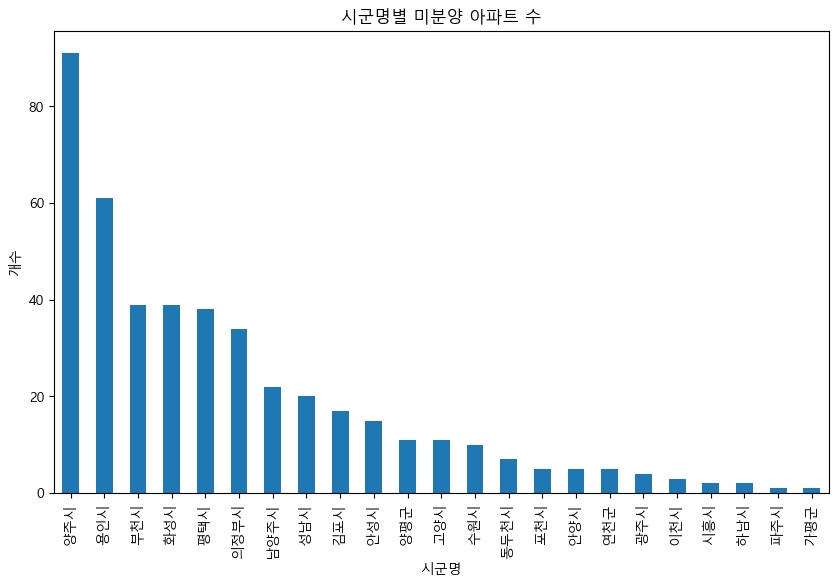

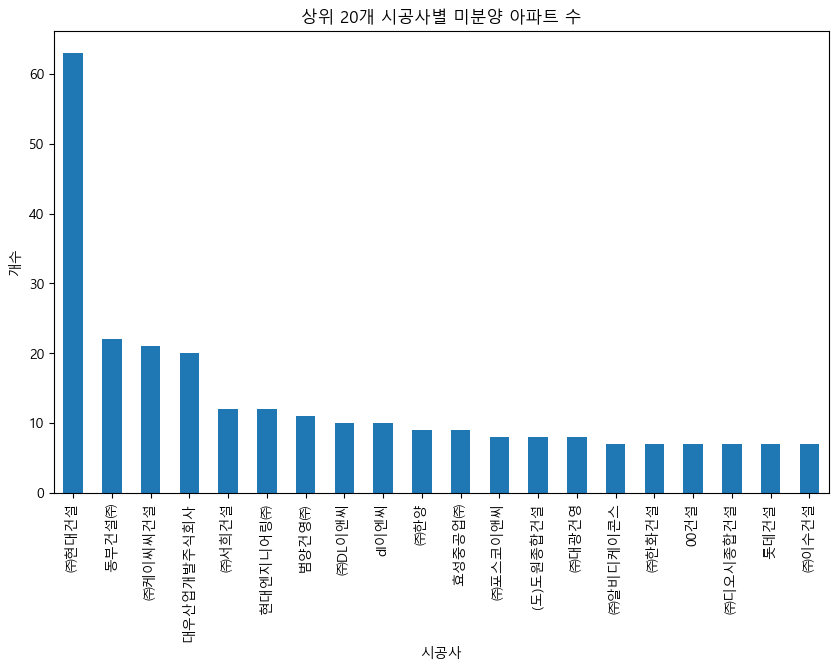

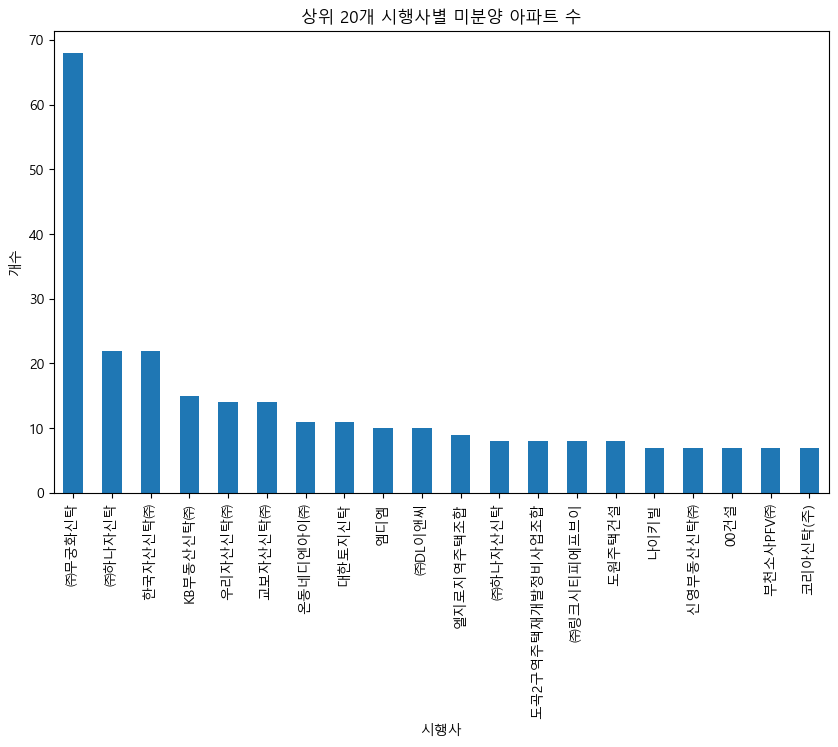

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# API 호출 기본 정보
API_KEY = '개인 API키'  # 본인의 인증키로 대체
BASE_URL = 'https://openapi.gg.go.kr/CopertnhousngUnsol'
PARAMS = {
    'KEY': API_KEY,
    'Type': 'json',
    'pIndex': 1,
    'pSize': 1000
}

# API 호출
response = requests.get(BASE_URL, params=PARAMS)
data = response.json()

# 데이터 추출
items = data['CopertnhousngUnsol'][1]['row']

# DataFrame으로 변환
df = pd.DataFrame(items)

# 시군명 기준 막대그래프
sigun_count = df['SIGUN_NM'].value_counts()

plt.figure(figsize=(10, 6))
sigun_count.plot(kind='bar')
plt.title('시군명별 미분양 아파트 수')
plt.xlabel('시군명')
plt.ylabel('개수')
plt.xticks(rotation=90)
plt.show()

# 시공사 정보 기준 상위 20개 막대그래프
constructor_count = df['CNSTRCT_BIZNES_INFO'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
constructor_count.plot(kind='bar')
plt.title('상위 20개 시공사별 미분양 아파트 수')
plt.xlabel('시공사')
plt.ylabel('개수')
plt.xticks(rotation=90)
plt.show()

# 시행사 정보 기준 상위 20개 막대그래프
implementer_count = df['IMPLMTN_BIZNES_INFO'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
implementer_count.plot(kind='bar')
plt.title('상위 20개 시행사별 미분양 아파트 수')
plt.xlabel('시행사')
plt.ylabel('개수')
plt.xticks(rotation=90)
plt.show()


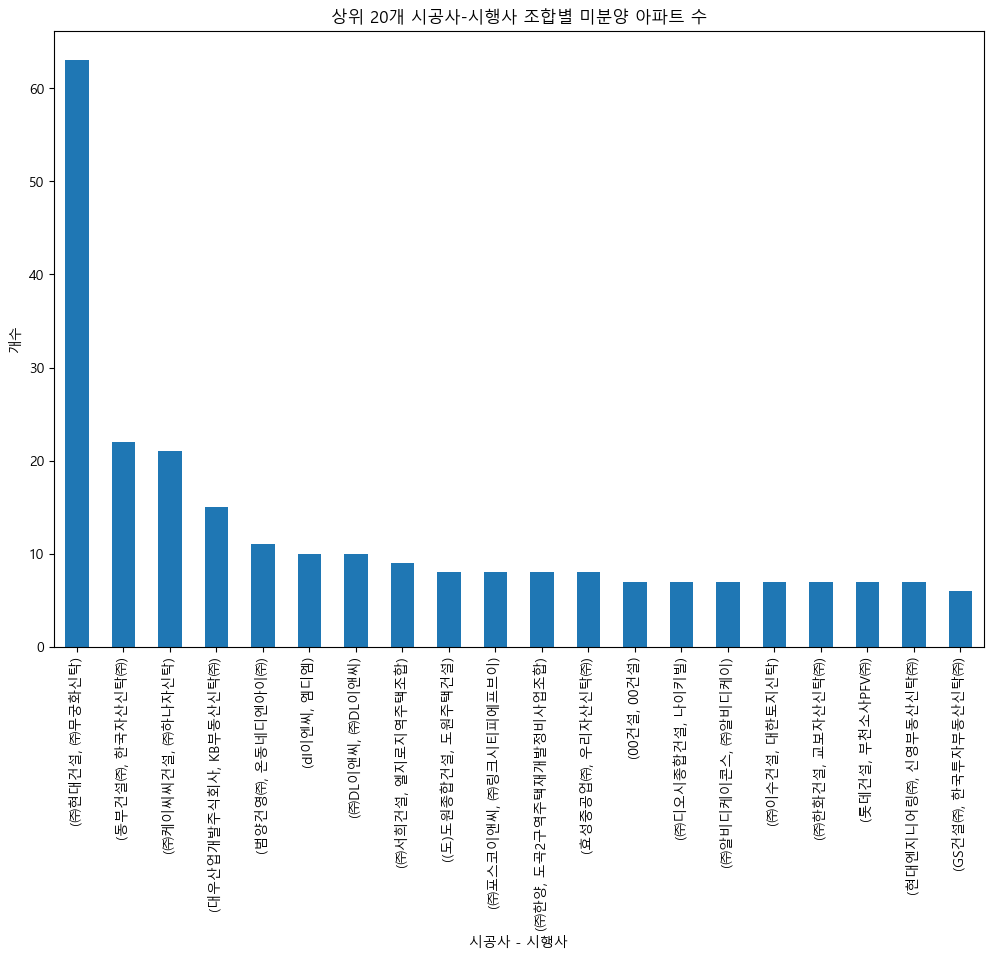

In [7]:
# 시공사-시행사 조합 상위 20개 빈도수 그래프
constructor_implementer_group = df.groupby(['CNSTRCT_BIZNES_INFO', 'IMPLMTN_BIZNES_INFO']).size().nlargest(20)
constructor_implementer_group.plot(kind='bar', figsize=(12, 8))
plt.title('상위 20개 시공사-시행사 조합별 미분양 아파트 수')
plt.xlabel('시공사 - 시행사')
plt.ylabel('개수')
plt.xticks(rotation=90)
plt.show()

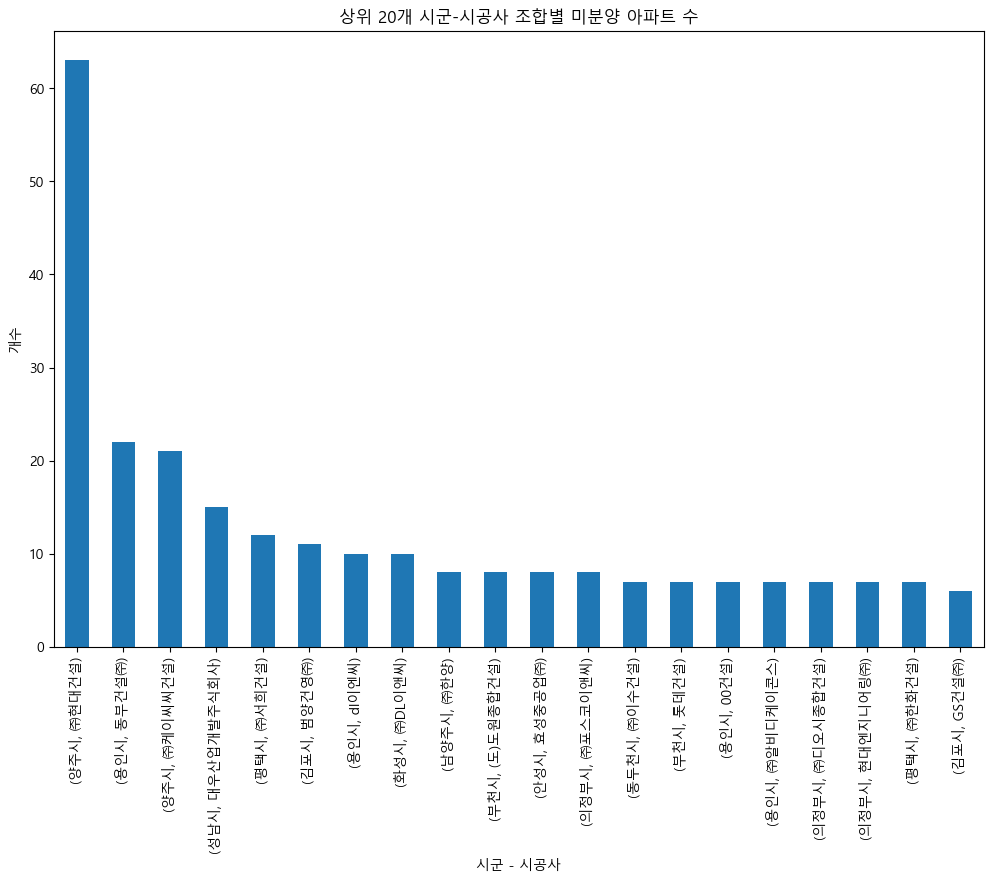

In [8]:
# 시군-시공사 조합 상위 20개 빈도수 그래프
sigun_constructor_group = df.groupby(['SIGUN_NM', 'CNSTRCT_BIZNES_INFO']).size().nlargest(20)
sigun_constructor_group.plot(kind='bar', figsize=(12, 8))
plt.title('상위 20개 시군-시공사 조합별 미분양 아파트 수')
plt.xlabel('시군 - 시공사')
plt.ylabel('개수')
plt.xticks(rotation=90)
plt.show()

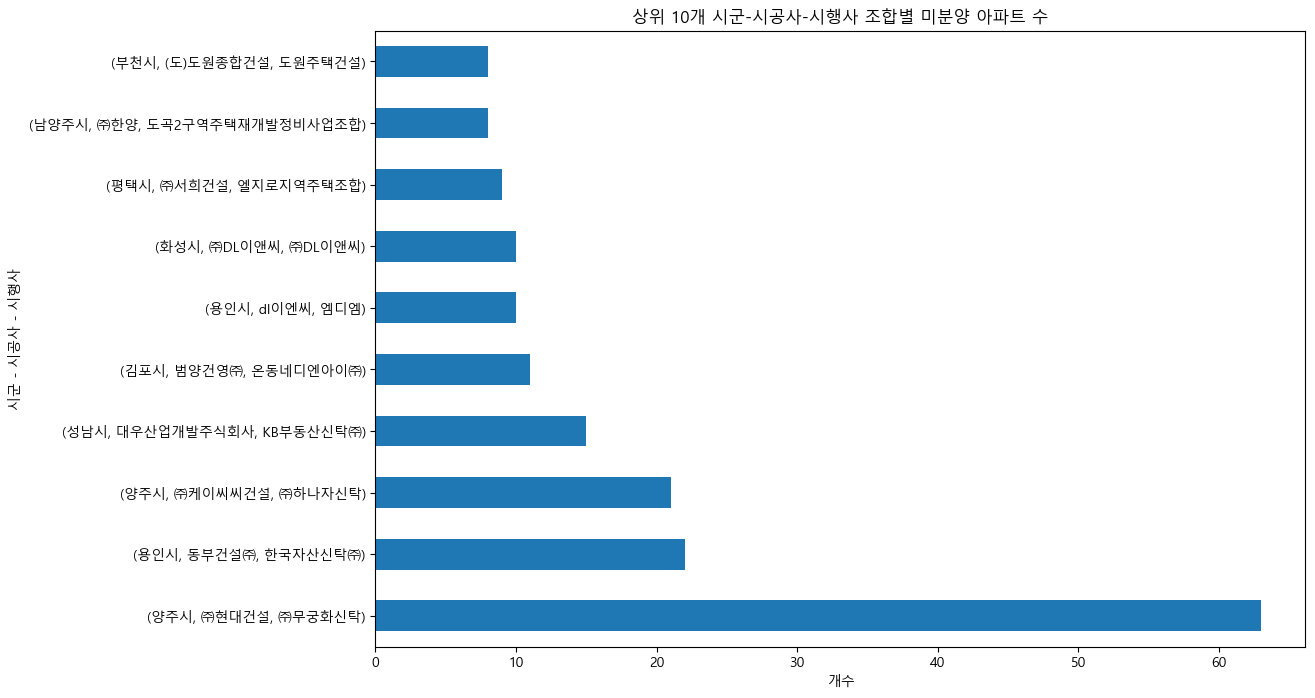

In [9]:
# 시군-시공사-시행사 조합 상위 10개 빈도수 그래프
sigun_constructor_implementer_group = df.groupby(['SIGUN_NM', 'CNSTRCT_BIZNES_INFO', 'IMPLMTN_BIZNES_INFO']).size().nlargest(10)

# 가로 막대그래프로 그리기
plt.figure(figsize=(12, 8))
sigun_constructor_implementer_group.plot(kind='barh')
plt.title('상위 10개 시군-시공사-시행사 조합별 미분양 아파트 수')
plt.xlabel('개수')
plt.ylabel('시군 - 시공사 - 시행사')
plt.show()